In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv('bank.csv',delimiter=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [42]:
df= data.copy()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [44]:
df.shape

(41188, 21)

In [45]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [46]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


These all are Numerical

In [47]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


These all are categorical 

In [48]:
def plotbar(column):
    temp1 = pd.DataFrame()
    temp1['No'] = df[df['y'] == 'no'][column].value_counts()
    temp1['Yes'] = df[df['y'] == 'yes'][column].value_counts()
    temp1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show()

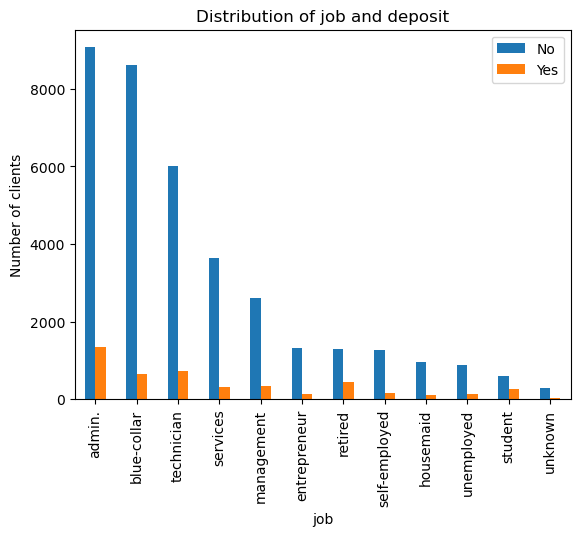

In [49]:
plotbar('job')

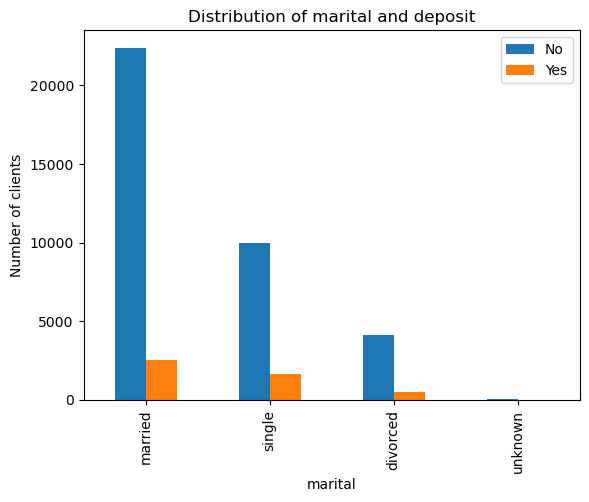

In [50]:
plotbar('marital')

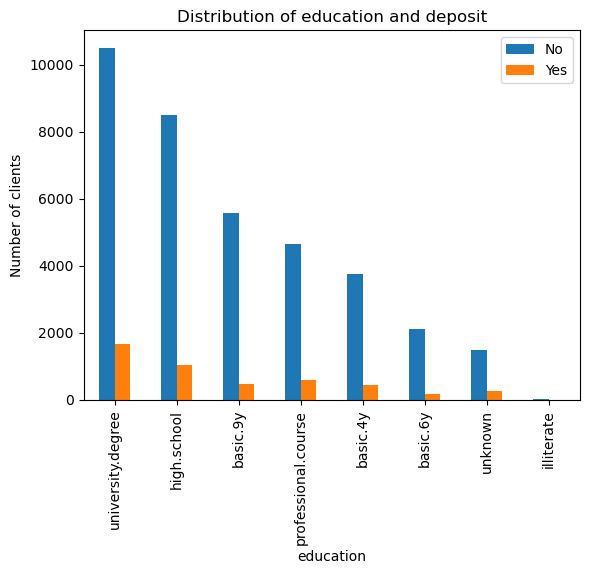

In [51]:
plotbar('education')

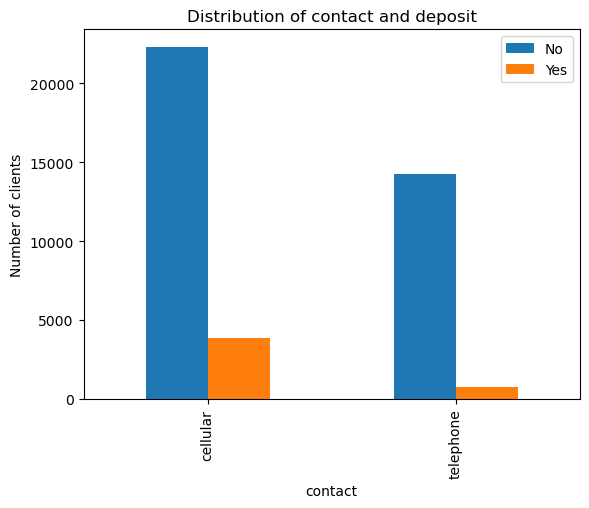

In [52]:
plotbar('contact')

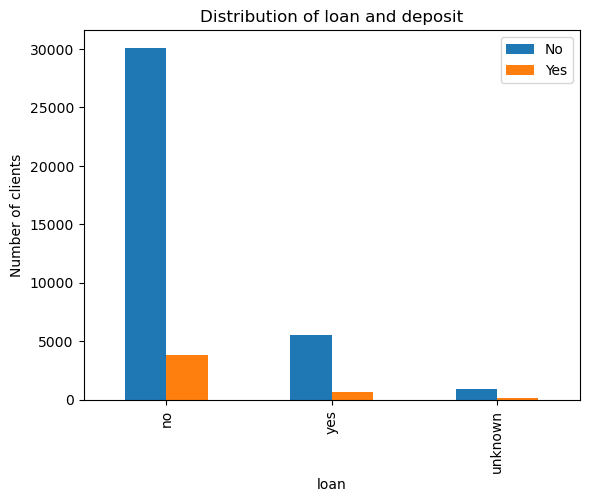

In [53]:
plotbar('loan')

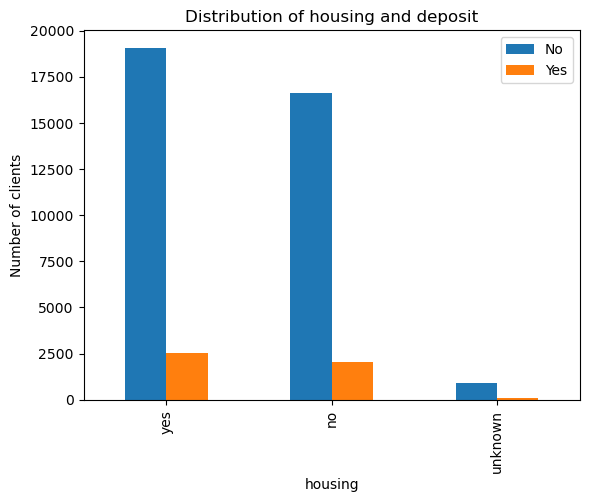

In [54]:
plotbar('housing')

# The primary analysis of several categorical features reveal
1 Administrative staff and specialists opened most deposits

2 Married customers agreed more often

3 Cellular is the best communication channel.

4 There's a huge difference between customers with loans and without loans

5 Homeownership has little impact on marketing performance.

# a. Missing Value Analysis

In [55]:
missing = df.isnull().sum()
print(missing)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


No Missing values 

# b. Label Encoding wherever required

In [56]:
df.y = df.y.map({'no':0, 'yes':1})#target variable
df.contact = df.contact.map({'cellular': 1,'telephone': 0})
df.loan = df.loan.map({'yes': 1,'unknown': 0,'no' : 0})
df.pdays = df.pdays.replace(999, 0)
df.default = df.default.map({'no': 1,'unknown': 0,'yes': 0})
df.housing = df.housing.map({'yes': 1,'unknown': 0,'no' : 0})
df.previous = [1 if x > 0 else 0 for x in df.previous]
df.poutcome = df.poutcome.map({'nonexistent':0, 'failure':0, 'success':1})

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['emp.var.rate'] = scaler.fit_transform(df['emp.var.rate'].values.reshape(-1, 1))

In [58]:
df['cons.price.idx'] = (df['cons.price.idx'] * 10)
df['cons.conf.idx'] = df['cons.conf.idx'] * -1
df['nr.employed'] = np.log2(df['nr.employed'])
df['cons.price.idx'] = np.log2(df['cons.price.idx'])
df['cons.conf.idx'] = np.log2(df['cons.conf.idx'])
df.age = np.log(df.age)

In [59]:
#for categorical data job,month,day of week ,marital,education
def encode(df, col):
    return pd.concat([df, pd.get_dummies(col, prefix=col.name)], axis=1)

In [60]:
df=encode(df,df['job'])
df=encode(df,df['month'])
df=encode(df,df['day_of_week'])
df=encode(df,df['marital'])
df=encode(df,df['education'])

In [61]:
df.drop(['job', 'month', 'day_of_week','education', 'marital'], axis=1, inplace=True)

In [62]:
df.loc[df['duration'] <= 102, 'duration'] = 1
df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration'] = 2
df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration'] = 3
df.loc[(df['duration'] > 319) & (df['duration'] <= 645), 'duration'] = 4
df.loc[df['duration']  > 645, 'duration'] = 5

In [63]:
df.columns

Index(['age', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'marital_divorced',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown']

In [64]:
df.shape

(41188, 55)

In [65]:
df.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,...,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,4.025352,1,0,0,0,3,1,0,0,0,...,False,False,True,False,False,False,False,False,False,False
1,4.043051,0,0,0,0,2,1,0,0,0,...,False,False,False,False,False,True,False,False,False,False
2,3.610918,1,1,0,0,3,1,0,0,0,...,False,False,False,False,False,True,False,False,False,False
3,3.688879,1,0,0,0,2,1,0,0,0,...,False,False,False,True,False,False,False,False,False,False
4,4.025352,1,0,1,0,3,1,0,0,0,...,False,False,False,False,False,True,False,False,False,False


# c.Selecting important features based on Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [67]:
X = df.drop('y', axis=1)  # Features
y = df['y'] 

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [69]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [70]:
sel.get_support()

array([ True, False,  True, False, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [71]:
selected_feat= X.columns[(sel.get_support())]
len(selected_feat)

10

In [72]:
selected_feat

Index(['age', 'housing', 'duration', 'campaign', 'pdays', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [73]:
x=X[selected_feat]

# d. Handling unbalanced data using SMOTE

In [74]:
y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

Data is unbalanced

In [77]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 36548, 1: 36548})


# e. Standardize the data using any one of the scalers provided by sklearn

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

In [80]:
scaler.fit(x)

StandardScaler()

In [81]:
X = scaler.fit_transform(x)

# a. Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [83]:
y_pred = logistic.predict(X_test)

In [106]:
from sklearn.metrics import classification_report
result = classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83     11005
           1       0.81      0.87      0.84     10924

    accuracy                           0.83     21929
   macro avg       0.83      0.83      0.83     21929
weighted avg       0.83      0.83      0.83     21929



# b. Decision Trees

In [99]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(criterion="gini",random_state=10)

In [100]:
DTclassifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [101]:
y_pred_DT  = DTclassifier.predict(X_test)

In [107]:
result = classification_report(y_test,y_pred_DT)
print(result)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     11005
           1       0.93      0.92      0.92     10924

    accuracy                           0.92     21929
   macro avg       0.92      0.92      0.92     21929
weighted avg       0.92      0.92      0.92     21929



# c. Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators=100,random_state=10)


In [110]:
RFclassifier.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [111]:
# predict the values
y_pred_RF  = RFclassifier.predict(X_test)

In [112]:

result = classification_report(y_test,y_pred_RF)

print(result)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     11005
           1       0.93      0.95      0.94     10924

    accuracy                           0.94     21929
   macro avg       0.94      0.94      0.94     21929
weighted avg       0.94      0.94      0.94     21929



In [114]:
from tabulate import tabulate
from sklearn import metrics

metrics_data = [
    ['Model', 'Logistic Regression'],
    ['AUC Score', metrics.roc_auc_score(y_test, y_pred)],
    ['Precision Score', metrics.precision_score(y_test, y_pred)],
    ['Recall Score', metrics.recall_score(y_test, y_pred)],
    ['Accuracy Score', metrics.accuracy_score(y_test, y_pred)],
    ['F1 Score', metrics.f1_score(y_test, y_pred)]
]

print(tabulate(metrics_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-----------------+---------------------+
| Metric          | Value               |
+=================+=====================+
| Model           | Logistic Regression |
+-----------------+---------------------+
| AUC Score       | 0.8326819630769343  |
+-----------------+---------------------+
| Precision Score | 0.8094384707287933  |
+-----------------+---------------------+
| Recall Score    | 0.8682716953496887  |
+-----------------+---------------------+
| Accuracy Score  | 0.8325505038989466  |
+-----------------+---------------------+
| F1 Score        | 0.8378235138238671  |
+-----------------+---------------------+


In [115]:

metrics_data = [
    ['Model', 'Decision Tree'],
    ['AUC Score', metrics.roc_auc_score(y_test, y_pred_DT)],
    ['Precision Score', metrics.precision_score(y_test, y_pred_DT)],
    ['Recall Score', metrics.recall_score(y_test, y_pred_DT)],
    ['Accuracy Score', metrics.accuracy_score(y_test, y_pred_DT)],
    ['F1 Score', metrics.f1_score(y_test, y_pred_DT)]
]

print(tabulate(metrics_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-----------------+--------------------+
| Metric          | Value              |
+=================+====================+
| Model           | Decision Tree      |
+-----------------+--------------------+
| AUC Score       | 0.924469054793675  |
+-----------------+--------------------+
| Precision Score | 0.9273330874216157 |
+-----------------+--------------------+
| Recall Score    | 0.9205419260344196 |
+-----------------+--------------------+
| Accuracy Score  | 0.9244835605818779 |
+-----------------+--------------------+
| F1 Score        | 0.9239250275633958 |
+-----------------+--------------------+


In [116]:
metrics_data = [
    ['Model', 'Random Forest'],
    ['AUC Score', metrics.roc_auc_score(y_test, y_pred_RF)],
    ['Precision Score', metrics.precision_score(y_test, y_pred_RF)],
    ['Recall Score', metrics.recall_score(y_test, y_pred_RF)],
    ['Accuracy Score', metrics.accuracy_score(y_test, y_pred_RF)],
    ['F1 Score', metrics.f1_score(y_test, y_pred_RF)]
]

print(tabulate(metrics_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-----------------+--------------------+
| Metric          | Value              |
+=================+====================+
| Model           | Random Forest      |
+-----------------+--------------------+
| AUC Score       | 0.9382403324875964 |
+-----------------+--------------------+
| Precision Score | 0.9306093060930609 |
+-----------------+--------------------+
| Recall Score    | 0.9465397290369828 |
+-----------------+--------------------+
| Accuracy Score  | 0.9382096766838434 |
+-----------------+--------------------+
| F1 Score        | 0.9385069208078057 |
+-----------------+--------------------+


# Random Forest :model performs better in predicting if the client will subscribe to term deposit or not